In [1]:
from scipy.signal import chirp
import scipy.io.wavfile as wav
import numpy as np
#%matplotlib notebook
import matplotlib.pyplot as plt
from IPython.display import Audio

samplerate=16000  #sampling frequency in Hz
t1=2.0 #End time
f0=100 #start frequency in Hz
f1=8000 #end frequency in Hz
t=np.linspace(0,t1,int(t1*samplerate)) #sample times
chirpsig=chirp(t, f0, t1, f1)
wav.write("chirp.wav",samplerate,np.int16(chirpsig*2**14))

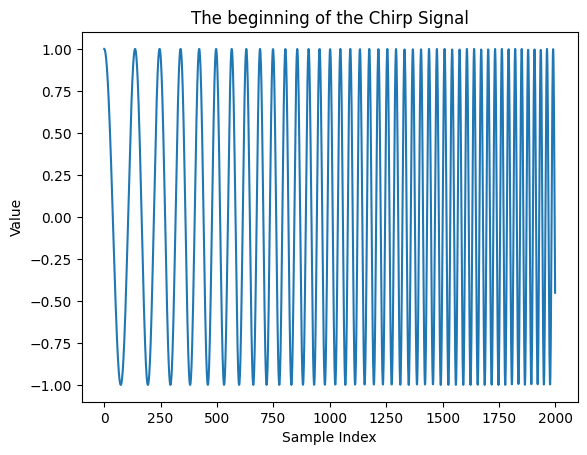

In [2]:
plt.plot(chirpsig[0:2000])
plt.title('The beginning of the Chirp Signal')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.show()

In [3]:
Audio("chirp.wav")

In [6]:
chirpsigdownsampled=chirpsig[::2]
wav.write("chirpdownsampled.wav", samplerate//2, np.int16(chirpsigdownsampled*2**14))
Audio("chirpdownsampled.wav")

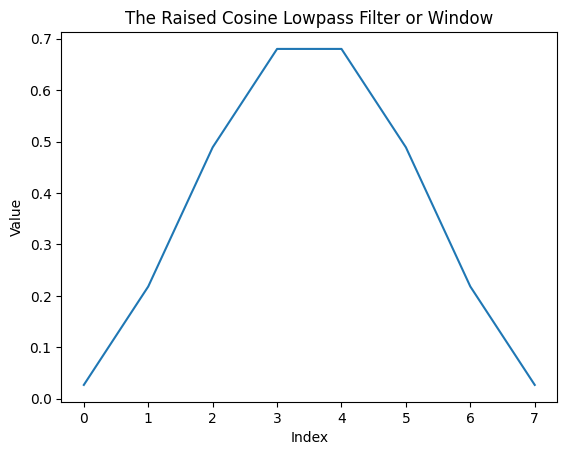

In [7]:
N=8 #length of filter
rc=(1-np.cos(2*np.pi/N*np.arange(0.5,N)))/np.sqrt(N) #raised cosine
plt.plot(rc)
plt.title('The Raised Cosine Lowpass Filter or Window')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

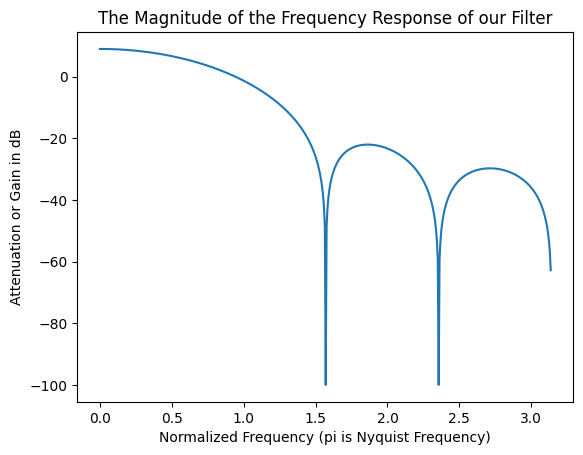

In [8]:
import scipy.signal as sp
w,H=sp.freqz(rc)
plt.plot(w, 20*np.log10(abs(H)+1e-5))
plt.title('The Magnitude of the Frequency Response of our Filter')
plt.xlabel('Normalized Frequency (pi is Nyquist Frequency)')
plt.ylabel('Attenuation or Gain in dB')
plt.show()

In [9]:
chirplowpass=sp.lfilter(rc,1,chirpsig)
chirplowpasssampled=chirplowpass[::2]
wav.write("chirplowpasssampled.wav",samplerate//2,np.int16(chirplowpasssampled*2 **13))
Audio("chirplowpasssampled.wav")

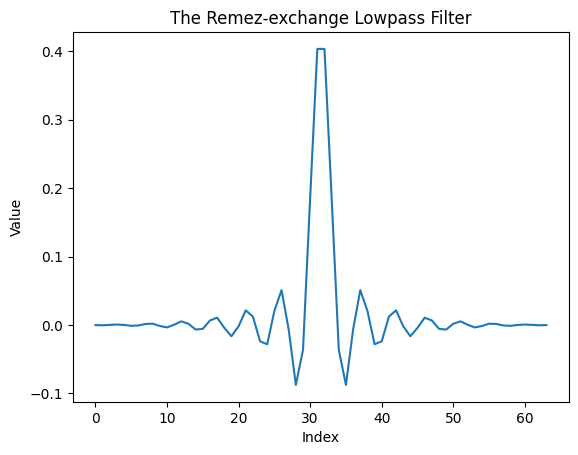

In [10]:
# Usage: remez(numtaps, bands, desired, weight=None, Hz=1)
#Passband: 0, 3000
#Stopband: 4000, 8000
#Desired band output: 1, 0
#Sampling frequency: Hz=16000
lpremez=sp.remez(64,[0, 3000, 4000, 8000],[1,0],Hz=16000)
plt.plot(lpremez)
plt.title('The Remez-exchange Lowpass Filter')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

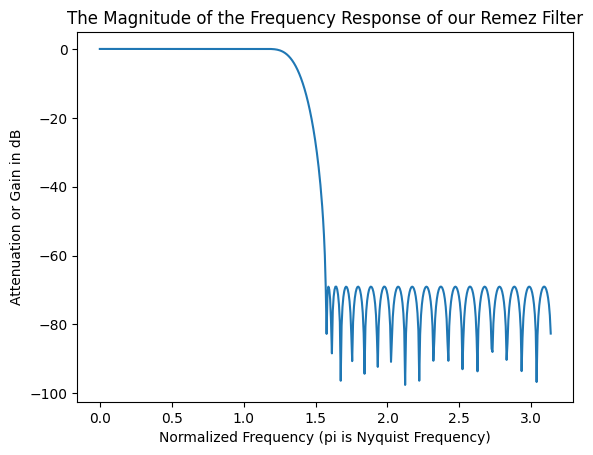

In [11]:
w,H=sp.freqz(lpremez)
plt.plot(w, 20*np.log10(abs(H)+1e-5))
plt.title('The Magnitude of the Frequency Response of our Remez Filter')
plt.xlabel('Normalized Frequency (pi is Nyquist Frequency)')
plt.ylabel('Attenuation or Gain in dB')
plt.show()

In [13]:
hirplowpass=sp.lfilter(lpremez,1,chirpsig)
chirplowpasssampled=chirplowpass[::2]
wav.write("chirplowpassremezsampled.wav",samplerate//2,np.int16(chirplowpasssampled*2**13))
Audio("chirplowpassremezsampled.wav")